## COVID-19
### Germany
#### Data source:
http://www.nexolin.de/data/covid-19/rki/rki_data.csv based on
https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Fallzahlen.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [10]:
df_rki = pd.read_csv("http://www.nexolin.de/data/covid-19/rki/rki_data.csv", parse_dates=['date'])
df_rki.dtypes

Bundesland            object
date          datetime64[ns]
confirmed              int64
deaths                 int64
dtype: object

In [11]:
df_rki['days'] = df_rki.groupby(['Bundesland','date']).filter(lambda x: x['confirmed']>50).groupby('Bundesland').cumcount() + 1
df_rki['confirmed_diff'] = df_rki.groupby('Bundesland').confirmed.diff()
df_rki = df_rki.set_index(['Bundesland','date'])
df_rki

confirmed  deaths  days  confirmed_diff
Bundesland        date                                               
Baden-Württemberg 2020-02-29         14       0   NaN             NaN
                  2020-03-01         15       0   NaN             1.0
                  2020-03-02         19       0   NaN             4.0
                  2020-03-03         28       0   NaN             9.0
                  2020-03-04         50       0   NaN            22.0
...                                 ...     ...   ...             ...
Thüringen         2020-03-29        697       5  15.0           113.0
                  2020-03-30        719       5  16.0            22.0
                  2020-03-31        784       6  17.0            65.0
                  2020-04-01        860       6  18.0            76.0
                  2020-04-02        925       7  19.0            65.0

[515 rows x 4 columns]

In [12]:
df_rki['days'] = df_rki.groupby(level=[0,1]).filter(lambda x: x['confirmed']>50).groupby('Bundesland').cumcount() + 1
df_rki['confirmed_diff'] = df_rki.groupby('Bundesland').confirmed.diff()
df_rki

confirmed  deaths  days  confirmed_diff
Bundesland        date                                               
Baden-Württemberg 2020-02-29         14       0   NaN             NaN
                  2020-03-01         15       0   NaN             1.0
                  2020-03-02         19       0   NaN             4.0
                  2020-03-03         28       0   NaN             9.0
                  2020-03-04         50       0   NaN            22.0
...                                 ...     ...   ...             ...
Thüringen         2020-03-29        697       5  15.0           113.0
                  2020-03-30        719       5  16.0            22.0
                  2020-03-31        784       6  17.0            65.0
                  2020-04-01        860       6  18.0            76.0
                  2020-04-02        925       7  19.0            65.0

[515 rows x 4 columns]

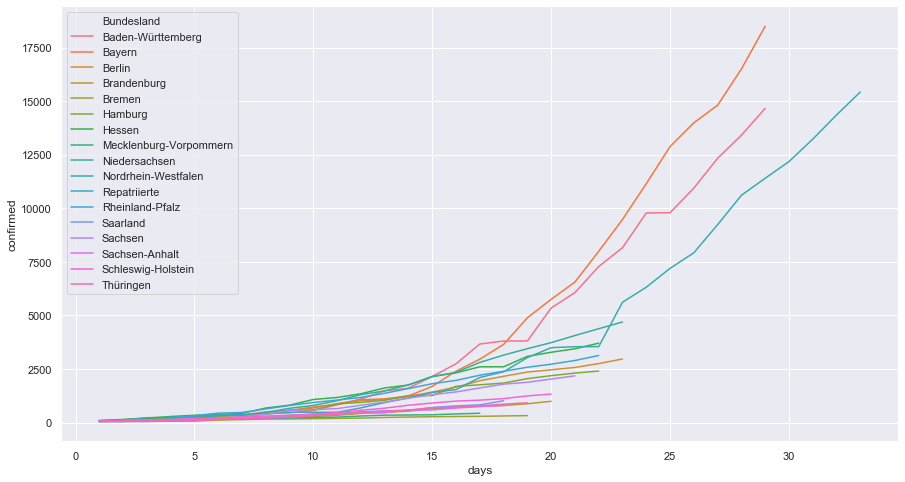

In [13]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
df_plot_data = df_rki.reset_index()
sns.lineplot(data = df_plot_data, y='confirmed', x='days', hue='Bundesland')


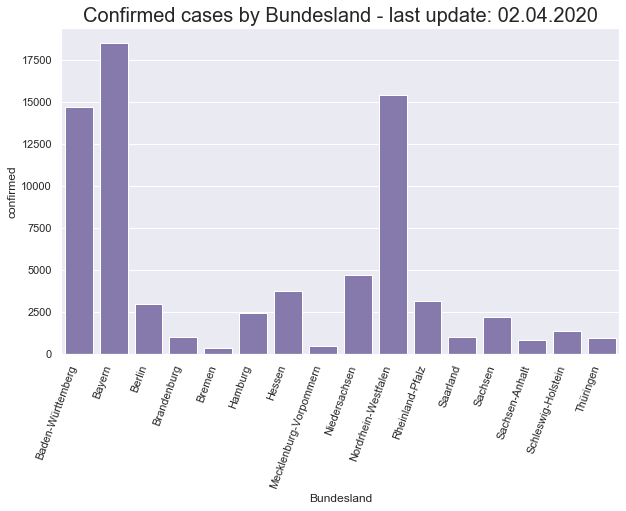

In [14]:
df_plot_data = df_rki.loc[pd.IndexSlice[:,df_rki.reset_index().date.max()],:].reset_index()
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax = sns.barplot(data=df_plot_data, x='Bundesland', y='confirmed', color='C4')
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=70, ha='right')
_ = ax.set_title('Confirmed cases by Bundesland - last update: {}'.format(df_rki.reset_index().date.max().strftime('%d.%m.%Y')), fontsize=20)

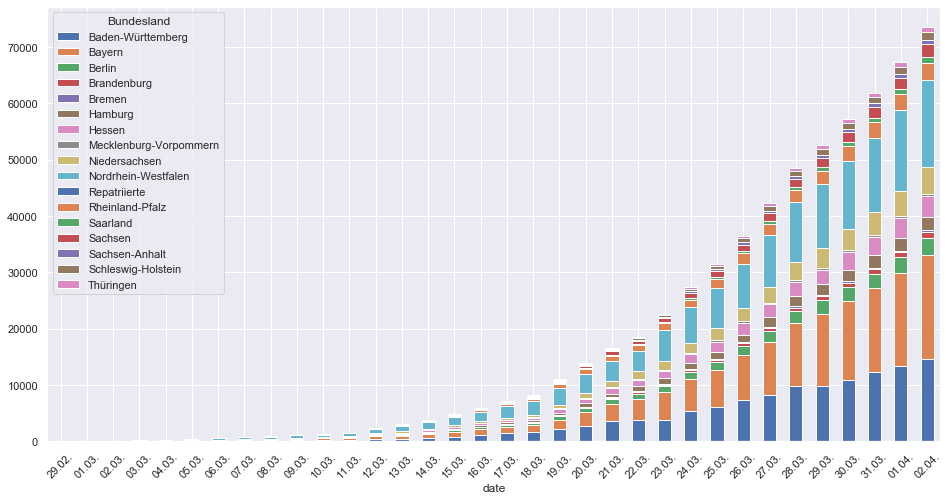

In [15]:
df_plot_data = df_rki.unstack(level=0).loc[:, pd.IndexSlice['confirmed',:]]
df_plot_data.columns = df_plot_data.columns.droplevel()
ax = df_plot_data.plot(kind='bar', stacked=True, figsize=(16,8))
xticks = [tick.strftime('%d.%m.') for tick in df_plot_data.index]
_ = ax.set_xticklabels(xticks,rotation=45, ha='center')


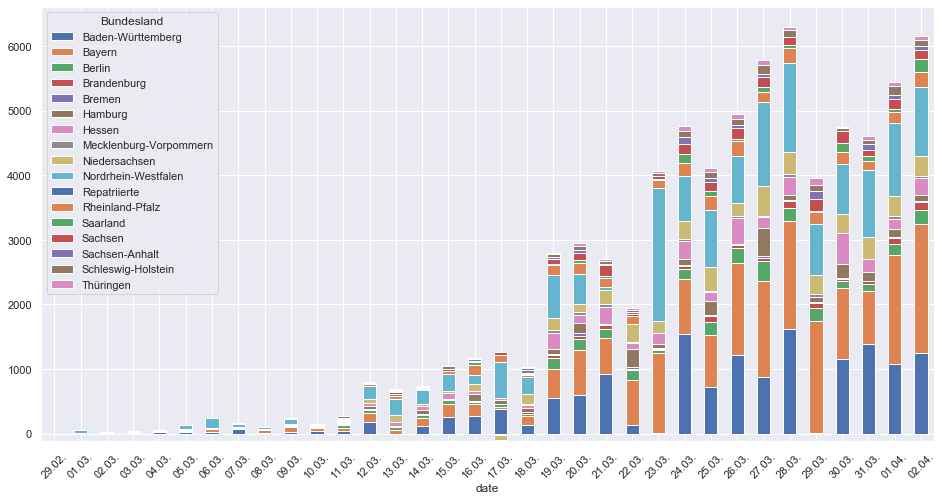

In [16]:
df_plot_data = df_rki.unstack(level=0).loc[:, pd.IndexSlice['confirmed_diff',:]]
df_plot_data.columns = df_plot_data.columns.droplevel()
ax = df_plot_data.plot(kind='bar', stacked=True, figsize=(16,8))
xticks = [tick.strftime('%d.%m.') for tick in df_plot_data.index]
_ = ax.set_xticklabels(xticks,rotation=45, ha='center')


In [17]:
df_rki.loc[pd.IndexSlice[:,'24/03/2020'],:]

,,confirmed,deaths,days,confirmed_diff
Bundesland,date,,,,
Baden-Württemberg,2020-03-24,5348,30,20.0,1537.0
Bayern,2020-03-24,5754,30,20.0,862.0
Berlin,2020-03-24,1220,1,14.0,143.0
Brandenburg,2020-03-24,343,0,11.0,55.0
Bremen,2020-03-24,183,0,10.0,13.0
Hamburg,2020-03-24,1043,0,13.0,100.0
Hessen,2020-03-24,1620,4,13.0,273.0
Mecklenburg-Vorpommern,2020-03-24,199,0,8.0,27.0
Niedersachsen,2020-03-24,1764,6,14.0,281.0
